In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/BELAJAR-PEMROGRAMAN/Dicky_X_RPL_B/CODING/KULIAH_ITB/KULIAH INFORMATIKA/"))


# Any results you write to the current directory are saved as output.

['MATEMATIKA-DISKRIT']


In [2]:
gps_user_review=pd.read_csv("googleplaystore_user_reviews.csv")
googlePS=pd.read_csv("googleplaystore.csv")

In [3]:
googlePS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
googlePS.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#googlePS.Category.value_counts()
#googlePS.Reviews.value_counts() #str

C:\Users\Dicky\AppData\Local\Temp\ipykernel_7364\3564526542.py:23: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x=sorted_data['category_list'][:5],y=sorted_data['review_list'][:5])  #first 5


Text(0, 0.5, 'Reviews / Million')

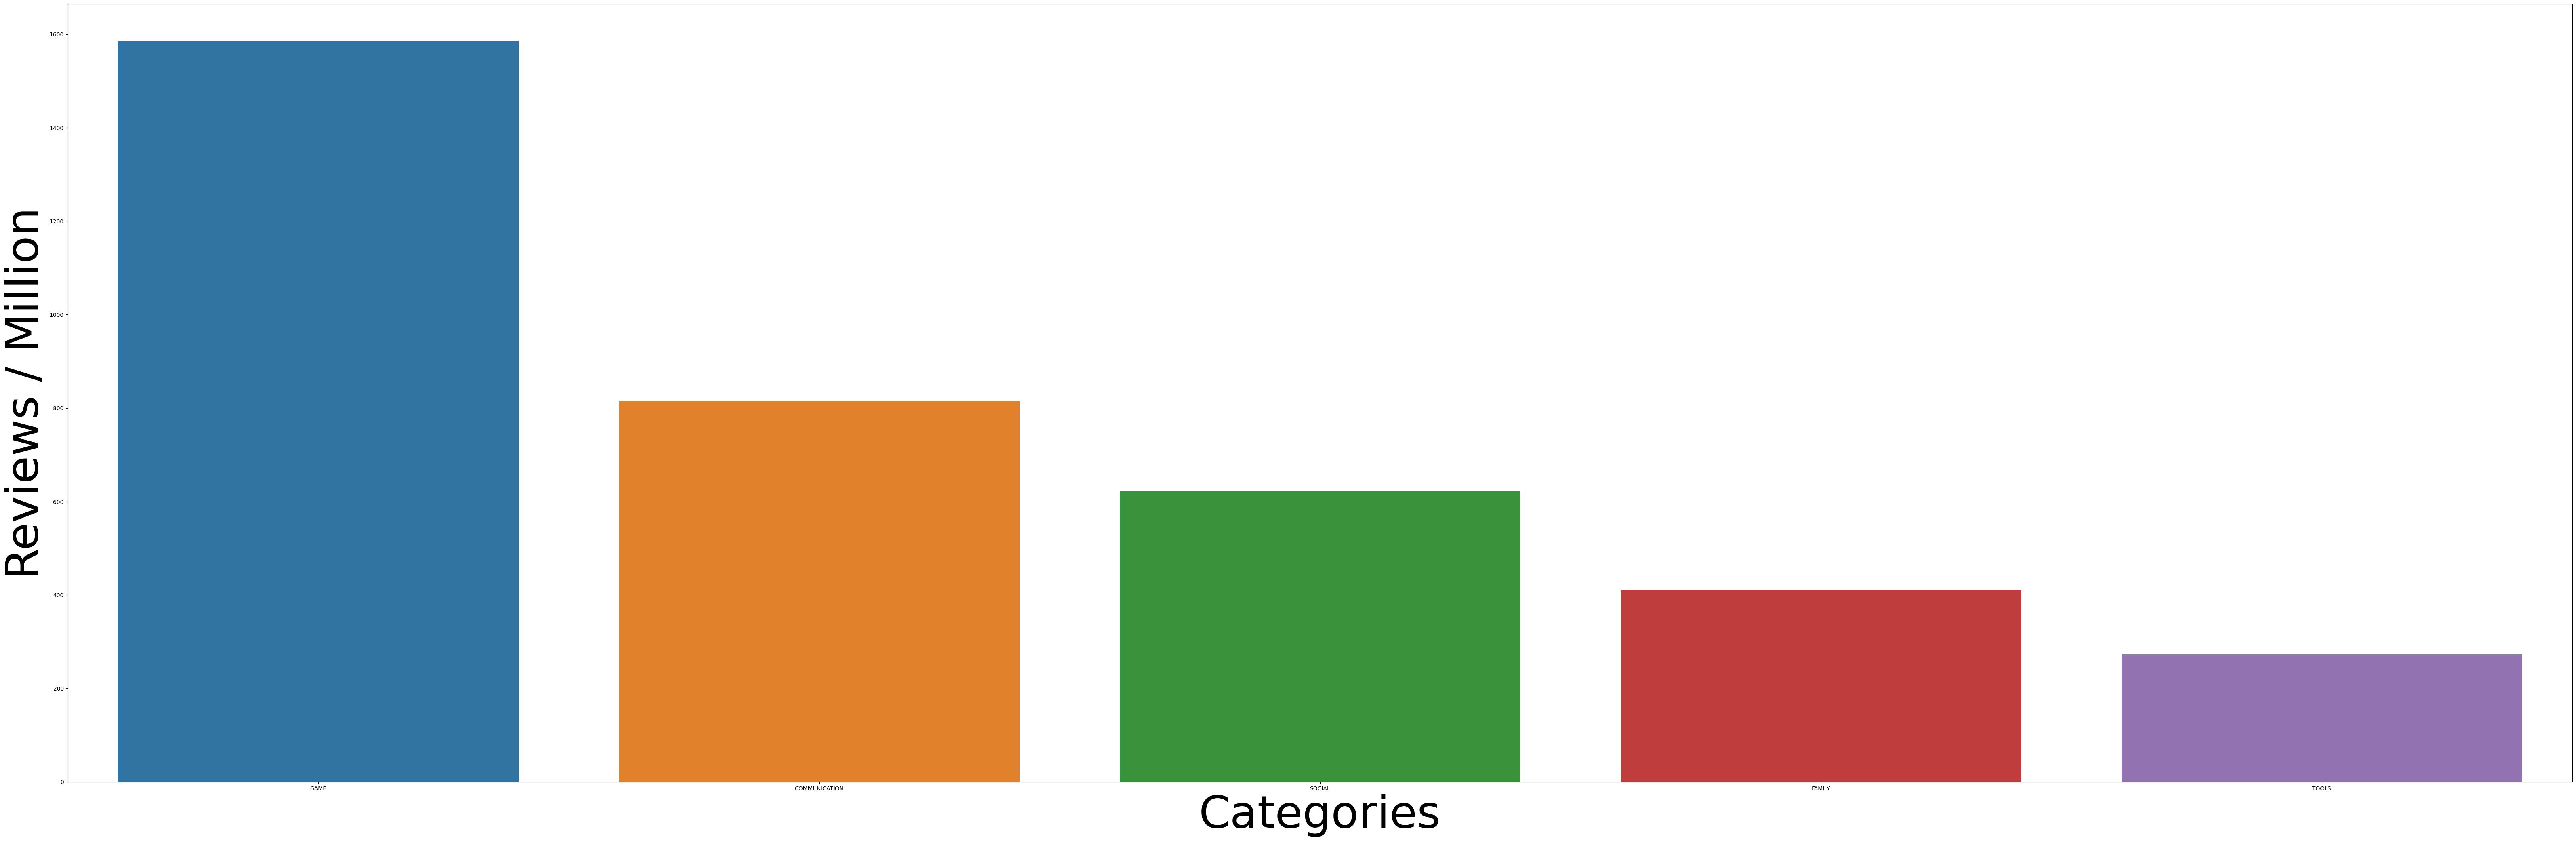

In [6]:
# reviews according to categories

googlePS.Category.replace(['1.9'],'noCatagory',inplace=True) #cleaning data
googlePS.Reviews.replace(['3.0M'],3000000.0,inplace=True)    #cleaning data
googlePS.Reviews=googlePS.Reviews.astype(float)  

category_list=list(googlePS.Category.unique())
review_list=[]

for i in category_list:
    filter_for_catagory=googlePS.Category==i
    filtered=googlePS[filter_for_catagory]
    sum_reviewsfor_catagory=sum(filtered.Reviews)/1000000   #million
    review_list.append(sum_reviewsfor_catagory)

dataFrame=pd.DataFrame({'review_list':review_list,'category_list':category_list})

index=(dataFrame['review_list'].sort_values(ascending=False)).index.values
sorted_data=dataFrame.reindex(index)


plt.figure(figsize=(80,25))
sns.barplot(x=sorted_data['category_list'][:5],y=sorted_data['review_list'][:5])  #first 5 
plt.rc('font', size=15)  

plt.xlabel('Categories',fontsize=80)
plt.ylabel('Reviews / Million',fontsize=80)




In [7]:
#compare Installs and Size according to category
googlePS.Size.head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [8]:
googlePS.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [9]:
#clearing process for Size

#Firstly, we need to look at if there are any other values with last index 'k' and 'M'
thaLastIndex=[]
for i in googlePS['Size']:
    if i[-1] !='M' and i[-1] !='k' :
        thaLastIndex.append(i)
        
Counter(thaLastIndex)
#the values with last index '+' and 'e' will be removed to clear data

Counter({'Varies with device': 1695, '1,000+': 1})

In [10]:

cleared_data_for_size=[]

for i in googlePS['Size']:
    if i[-1]=='k':
        cleared_data_for_size.append(float(i[:-1])*1000)
    elif i[-1]=='M':
        cleared_data_for_size.append(float(i[:-1])*1000000)
    else:
        cleared_data_for_size.append(0.0)   # the values will be replaced by the avarage value of the Size 

#Counter(cleared_data_for_size)
googlePS.Size=pd.Series(cleared_data_for_size)
googlePS.Size.replace(0.0,googlePS.Size.mean(),inplace=True)
googlePS.Size.head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

In [11]:
#clearing process for Installs

#Firstly, we need to look at if there are any other values with last index '+'
thaLastIndex_for_Installs=[]
for i in googlePS['Installs']:
    if i[-1] !='+':
        thaLastIndex_for_Installs.append(i)
        
Counter(thaLastIndex_for_Installs)
#Counter({'0': 1, 'Free': 1})


Counter({'0': 1, 'Free': 1})

In [12]:
#the values '0' and 'Free' will be replaced by '0+' to make suitibale with other values
googlePS.Installs.replace('0','0+',inplace=True)
googlePS.Installs.replace('Free','0+',inplace=True)

#the Install values has ',' which prevent us to convert to float, so we need to remove these
replaced_for_Installs=[]
[replaced_for_Installs.append(float(x[:-1].replace(',' , '')))for x in googlePS.Installs]

googlePS.Installs=pd.Series(replaced_for_Installs)
googlePS.Installs.head()


0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [13]:
#For each category, we need to take sum of Installs and Size to compare them according to category.
data_for_Installs=[]
data_for_Sizes=[]
for i in googlePS.Category.unique():
    filter_for_cat=googlePS.Category==i
    filtered=googlePS[filter_for_cat]
    data_for_Installs.append(sum(filtered.Installs))
    data_for_Sizes.append(sum(filtered.Size))
    
    
data_for_Installs=pd.Series(data_for_Installs)
data_for_Sizes=pd.Series(data_for_Sizes)
categories=googlePS.Category.unique()
#Normalization for graph
ratio_for_Installs=data_for_Installs/max(data_for_Installs)
ratio_for_Sizes=data_for_Sizes/max(data_for_Sizes)

data = pd.DataFrame({'categories': categories,'ratio_for_Installs':ratio_for_Installs,'ratio_for_Sizes':ratio_for_Sizes})
data.sort_values(by=['ratio_for_Sizes'],inplace=True)


TypeError: pointplot() got an unexpected keyword argument 'alpha'

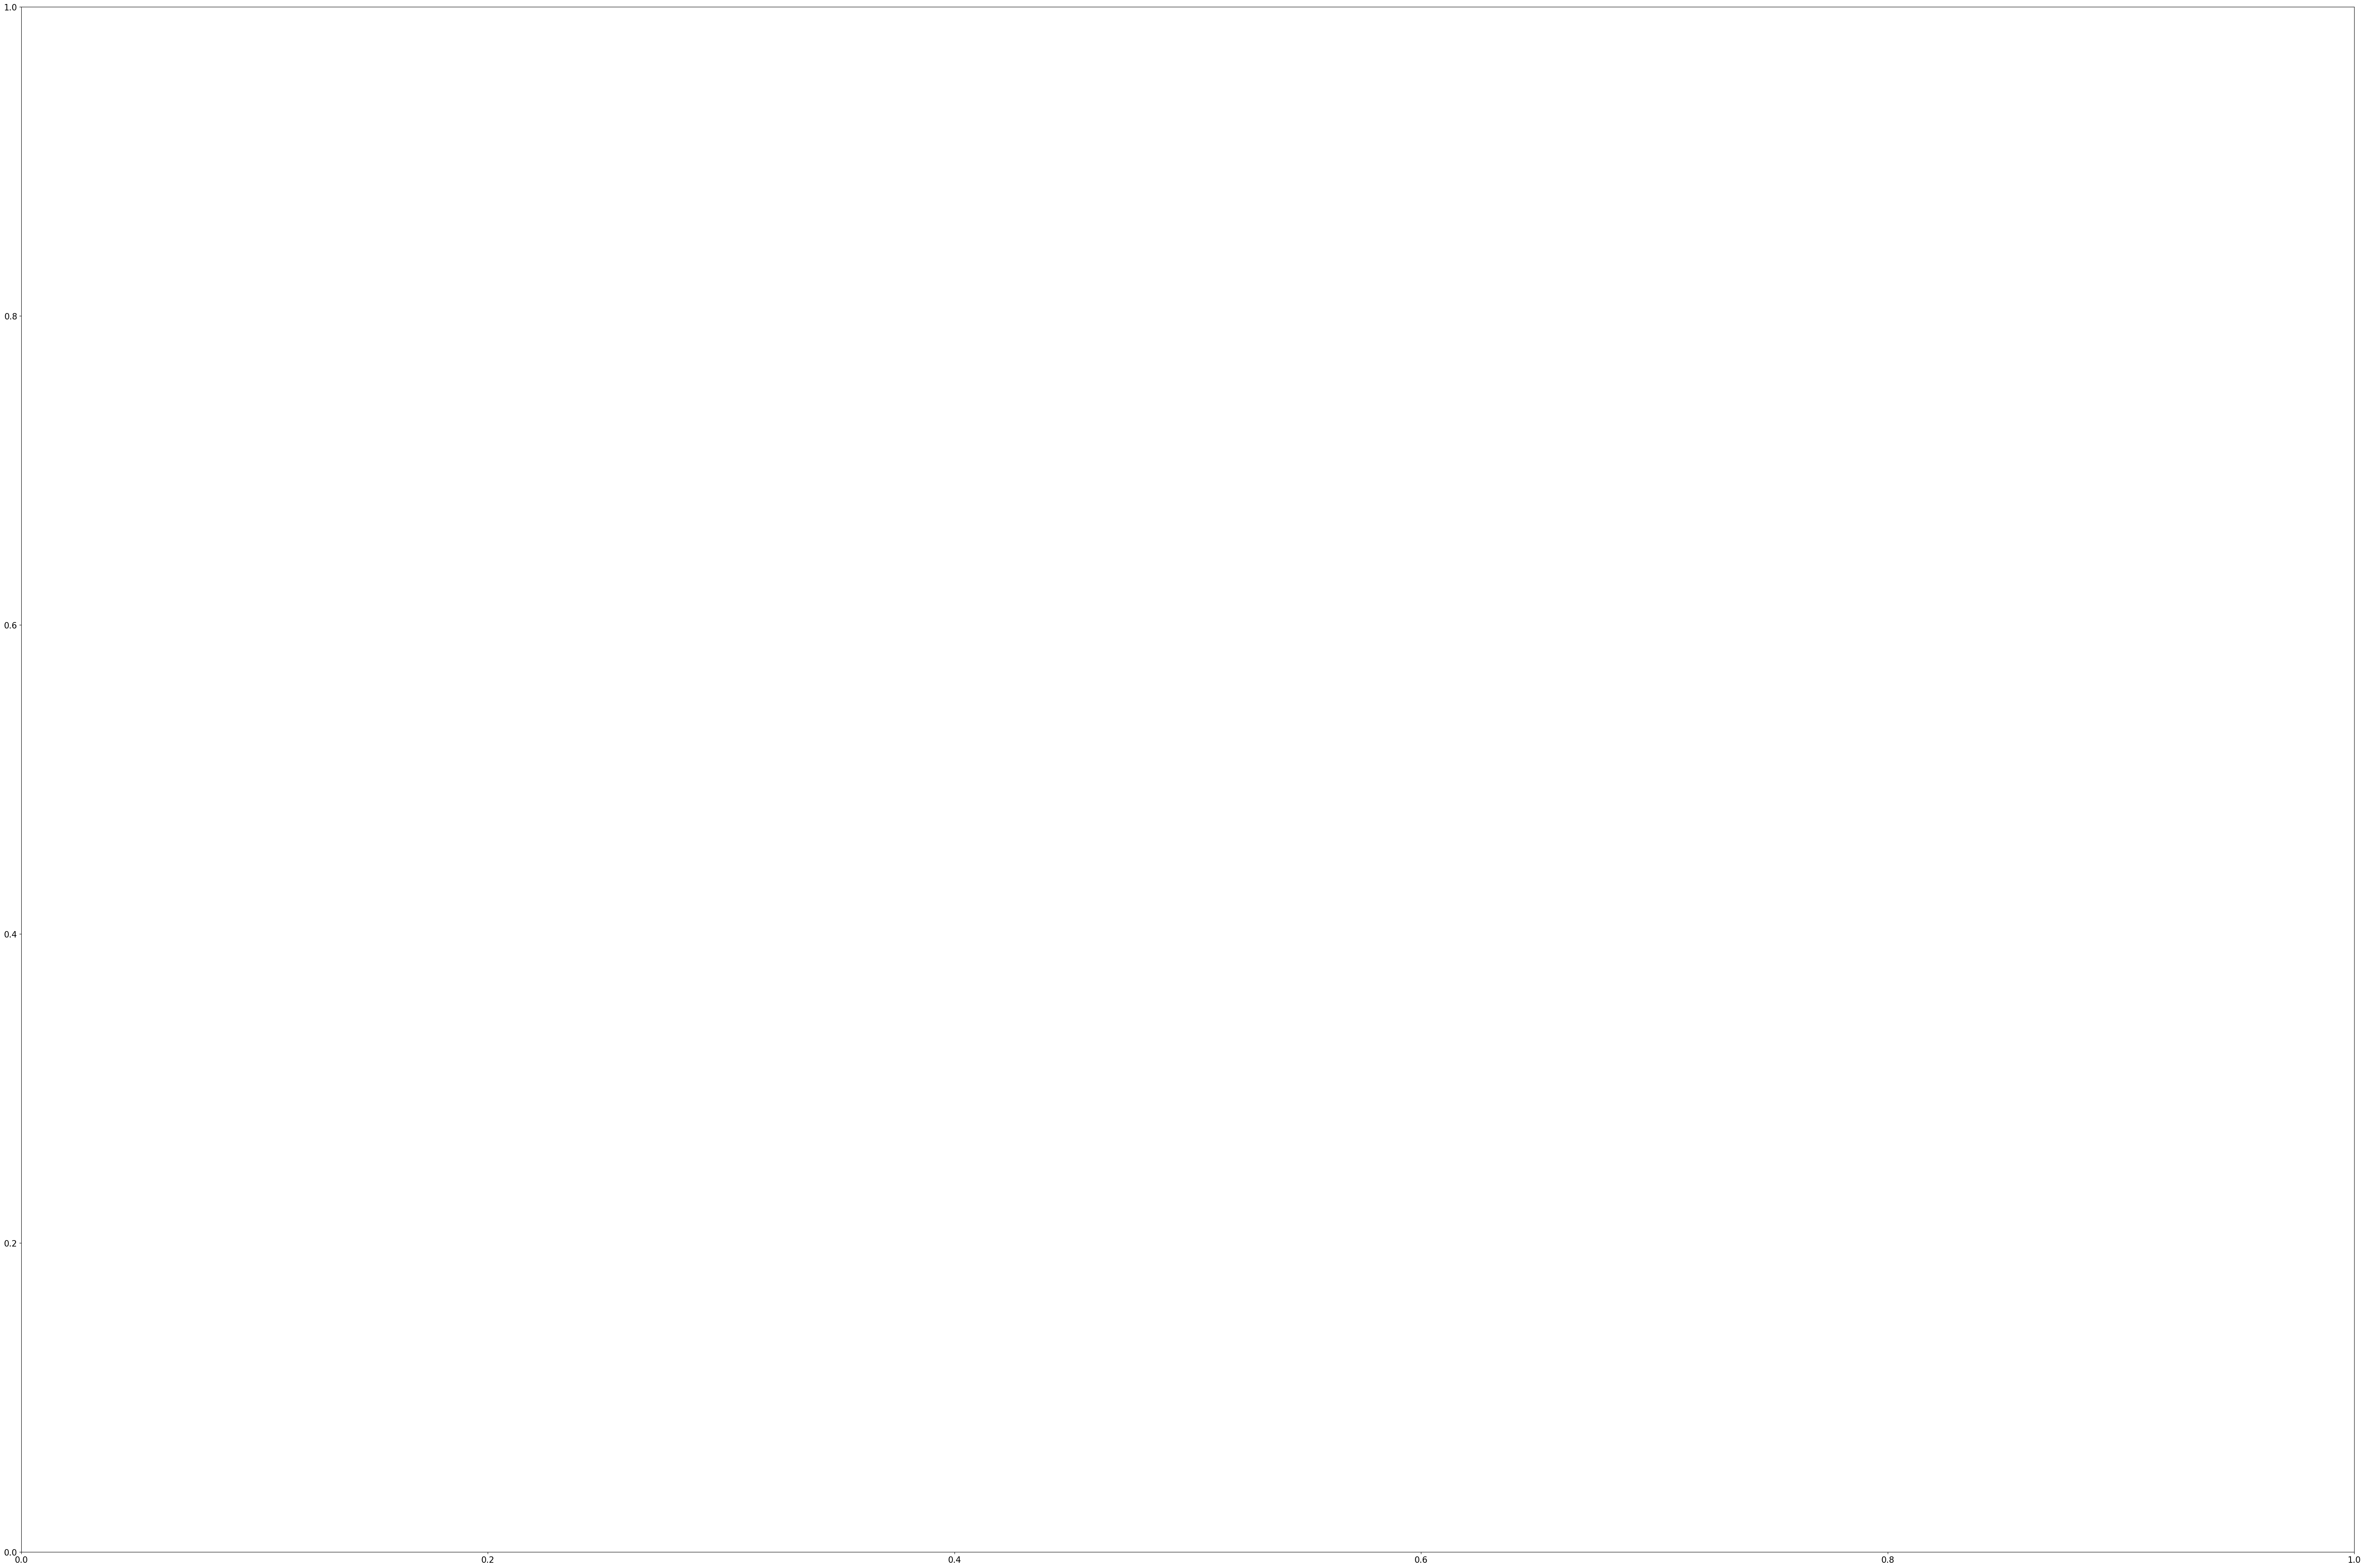

In [14]:
# we have cleaned data. We can plot the point graph
f,ax1=plt.subplots(figsize=(40,15))
f.set_size_inches(75, 50, forward=True)

sns.pointplot(x='categories',y='ratio_for_Installs',data=data,color='red',alpha=0.8)
sns.pointplot(x='categories',y='ratio_for_Sizes',data=data,color='lime',alpha=0.8)

plt.text(10,0.6,'Size',color='lime',fontsize=50)
plt.text(10,0.55,'Installs',color='red',fontsize=50)

plt.xlabel('Category',fontsize=80)
plt.ylabel('Values',fontsize=80)
plt.grid()




In [ ]:


g = sns.jointplot(data.ratio_for_Sizes, data.ratio_for_Installs, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

In [ ]:
sns.lmplot(x="ratio_for_Installs", y="ratio_for_Sizes", data=data)   
plt.show()

In [ ]:
googlePS.head()

In [ ]:
# Category rates according in googlePS data 

#we reduce the data to see better
filter1=googlePS.Category.value_counts()>googlePS.Category.value_counts().mean()
reduced_PS_data=googlePS.Category.value_counts()[filter1]
other_categories=googlePS.Category.value_counts()[~filter1]
value=[len(other_categories)]

reduced_PS_data=pd.concat([reduced_PS_data, pd.Series(value, index=['Others'])])



labels =reduced_PS_data.index
colors = ['grey','blue','red','yellow','green','brown']
explode = []
[explode.append(0) for i in range(len(reduced_PS_data))]


# visual
plt.figure(figsize = (7,7))
plt.pie(reduced_PS_data, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('googlePS Apps According to Category',color = 'blue',fontsize = 15)


In [ ]:
#data.head()

In [ ]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

In [ ]:
googlePS.head()

In [ ]:
#Some Chategories according to Installs and Content Rating

googlePS['Content Rating'].value_counts()

In [ ]:
#unrated and Adults only 18+ will be removed from data.
#There are too many categories, so i'm just analyzing the categories i'm interested in..

filter_for_chategory=(googlePS['Category'] =='GAME') | (googlePS['Category'] =='COMMUNICATION') | (googlePS['Category'] =='SHOPPING') | (googlePS['Category'] =='PHOTOGRAPHY')
filter_content=(googlePS['Content Rating'] != 'Unrated') & (googlePS['Content Rating'] != 'Adults only 18+' )

filrered_by_chategory_content=googlePS[filter_content & filter_for_chategory]

In [ ]:
sns.set(rc={'figure.figsize':(25,8)})

colors=sns.color_palette("husl", len(googlePS.Category.value_counts()))
sns.boxplot(x="Content Rating", y="Installs", hue="Category", data=filrered_by_chategory_content, palette="colorblind",showfliers=False)


plt.show()

In [ ]:
sns.countplot(filrered_by_chategory_content['Content Rating'])